In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

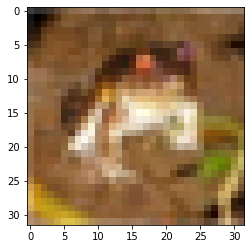

In [6]:
plt.imshow(x_train[0])

Preprocessing

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train.shape

(50000, 32, 32, 3)

To categorical

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

Model Building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [12]:
32*32*3

3072

In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
model.fit(x_train,y_cat_train,
          epochs=15,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 18s 369us/sample - loss: 1.4917 - acc: 0.4609 - val_loss: 1.2467 - val_acc: 0.5513
Epoch 2/15
50000/50000 [==============================] - 21s 427us/sample - loss: 1.1570 - acc: 0.5930 - val_loss: 1.1083 - val_acc: 0.6177
Epoch 3/15
50000/50000 [==============================] - 20s 402us/sample - loss: 1.0020 - acc: 0.6475 - val_loss: 1.0060 - val_acc: 0.6478
Epoch 4/15
50000/50000 [==============================] - 20s 406us/sample - loss: 0.8890 - acc: 0.6879 - val_loss: 0.9528 - val_acc: 0.6699
Epoch 5/15
50000/50000 [==============================] - 20s 407us/sample - loss: 0.8061 - acc: 0.7200 - val_loss: 0.9337 - val_acc: 0.6819
Epoch 6/15
50000/50000 [==============================] - 20s 394us/sample - loss: 0.7236 - acc: 0.7458 - val_loss: 0.9432 - val_acc: 0.6871
Epoch 7/15
50000/50000 [==============================] - 19s 382us/sample - loss: 0.6569 - acc: 0.7683 

In [18]:
metrics = pd.DataFrame(model.history.history)

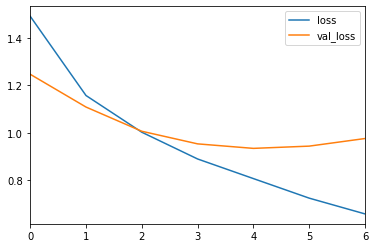

In [19]:
metrics[['loss','val_loss']].plot()

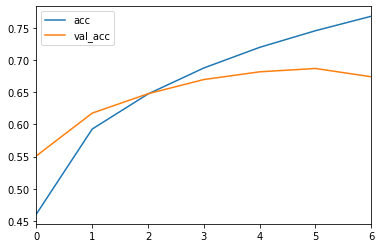

In [20]:
metrics[['acc','val_acc']].plot()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
predictions = model.predict_classes(x_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.78      0.82      0.80      1000
           2       0.53      0.60      0.56      1000
           3       0.44      0.63      0.52      1000
           4       0.71      0.54      0.62      1000
           5       0.70      0.38      0.50      1000
           6       0.76      0.77      0.76      1000
           7       0.76      0.70      0.73      1000
           8       0.74      0.82      0.78      1000
           9       0.74      0.77      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000

